## Submitted By
### Shweta Madhale
### CWID : 20015921

## Imports

In [341]:
import pandas as pd
import glob
import string
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\madha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\madha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\madha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Load VAERS Data

In [342]:
files_dir = 'C:/Users/madha/OneDrive/Documents/Fall 2023/CS 584 - NLP/Course Project/AllVAERSDataCSVS/'

In [343]:
vaers_data_files = glob.glob(files_dir + '*VAERSDATA.csv')
vaers_symptoms_files = glob.glob(files_dir + '*VAERSSYMPTOMS.csv')
vaers_vaccine_files = glob.glob(files_dir + '*VAERSVAX.csv')

In [344]:
def read_csv_with_encoding(file_path, encoding):
    with open(file_path, encoding=encoding, errors='ignore') as file:
        return pd.read_csv(file)

In [345]:
# Combining the VAERS data files
vaers_data = pd.concat([read_csv_with_encoding(file, 'utf-8') for file in vaers_data_files], ignore_index=True)
# Combining the VAERS symptoms files
vaers_symptoms = pd.concat([read_csv_with_encoding(file, 'utf-8') for file in vaers_symptoms_files], ignore_index=True)
# Combining the VAERS vaccine files
vaers_vaccine = pd.concat([read_csv_with_encoding(file, 'utf-8') for file in vaers_vaccine_files], ignore_index=True)

C:\Users\madha\AppData\Local\Temp\ipykernel_19764\3592219041.py:3: DtypeWarning: Columns (9,10,11,13,15,16,27) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(file)
C:\Users\madha\AppData\Local\Temp\ipykernel_19764\3592219041.py:3: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(file)
C:\Users\madha\AppData\Local\Temp\ipykernel_19764\3592219041.py:3: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(file)
C:\Users\madha\AppData\Local\Temp\ipykernel_19764\3592219041.py:3: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(file)
C:\Users\madha\AppData\Local\Temp\ipykernel_19764\3592219041.py:3: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(file)
C:\Users

In [6]:
vaers_data.columns

Index(['VAERS_ID', 'RECVDATE', 'STATE', 'AGE_YRS', 'CAGE_YR', 'CAGE_MO', 'SEX',
       'RPT_DATE', 'SYMPTOM_TEXT', 'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT',
       'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD', 'VAX_DATE',
       'ONSET_DATE', 'NUMDAYS', 'LAB_DATA', 'V_ADMINBY', 'V_FUNDBY',
       'OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'SPLTTYPE',
       'FORM_VERS', 'TODAYS_DATE', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT',
       'ALLERGIES'],
      dtype='object')

In [7]:
vaers_symptoms.columns

Index(['VAERS_ID', 'SYMPTOM1', 'SYMPTOMVERSION1', 'SYMPTOM2',
       'SYMPTOMVERSION2', 'SYMPTOM3', 'SYMPTOMVERSION3', 'SYMPTOM4',
       'SYMPTOMVERSION4', 'SYMPTOM5', 'SYMPTOMVERSION5'],
      dtype='object')

In [8]:
vaers_vaccine.columns

Index(['VAERS_ID', 'VAX_TYPE', 'VAX_MANU', 'VAX_LOT', 'VAX_DOSE_SERIES',
       'VAX_ROUTE', 'VAX_SITE', 'VAX_NAME'],
      dtype='object')

## Data Processing

In [12]:
# Selecting 'COVID19' as vaccine type
selected_vaccine = 'COVID19'

# Selecting 'PFIZER/BIONTECH' as the manufacturer
selected_manufacturer = 'PFIZER\BIONTECH'

# Extract data from VAERS Vaccine for selection criteria
selected_vaccine_data = vaers_vaccine[vaers_vaccine['VAX_TYPE'] == selected_vaccine]
selected_vaccine_data = selected_vaccine_data[selected_vaccine_data['VAX_MANU'] == selected_manufacturer]

# Extract IDs for selected data
selected_vaers_ids = selected_vaccine_data['VAERS_ID']

# Use IDs and extract 10000 reoports from VAERS Data
selected_data = vaers_data[vaers_data['VAERS_ID'].isin(selected_vaers_ids)].head(10000)

# Filter out missing data
selected_data = selected_data.dropna(subset=['SYMPTOM_TEXT'])

# Final Data
result_df = pd.merge(selected_data, selected_vaccine_data, on='VAERS_ID', how='inner')


In [13]:
result_df

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,OFC_VISIT,ER_ED_VISIT,ALLERGIES,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME
0,2673135,02/13/2012,NaN,56.0,55.0,NaN,F,NaN,"Headache, Fever, Body aches Narrative: Other ...",NaN,...,NaN,NaN,NaN,COVID19,PFIZER\BIONTECH,EK9231,2,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
1,902418,12/15/2020,NJ,56.0,56.0,NaN,F,NaN,Patient experienced mild numbness traveling fr...,NaN,...,NaN,NaN,none,COVID19,PFIZER\BIONTECH,EH9899,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
2,902440,12/15/2020,AZ,35.0,35.0,NaN,F,NaN,C/O Headache,NaN,...,NaN,NaN,NaN,COVID19,PFIZER\BIONTECH,EH 9899,1,SYR,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
3,902446,12/15/2020,WV,55.0,55.0,NaN,F,NaN,"felt warm, hot and face and ears were red and ...",NaN,...,NaN,NaN,"Contrast Dye IV contrast, shellfish, strawberry",COVID19,PFIZER\BIONTECH,EH9899,1,IM,RA,COVID19 (COVID19 (PFIZER-BIONTECH))
4,902464,12/15/2020,LA,42.0,42.0,NaN,M,NaN,within 15 minutes progressive light-headedness...,NaN,...,NaN,Y,none,COVID19,PFIZER\BIONTECH,EH9899,UNK,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10004,923710,01/06/2021,SC,NaN,NaN,NaN,U,NaN,aches; chills; This is a spontaneous report fr...,NaN,...,NaN,NaN,NaN,COVID19,PFIZER\BIONTECH,NaN,2,NaN,NaN,COVID19 (COVID19 (PFIZER-BIONTECH))
10005,923711,01/06/2021,MA,52.0,NaN,NaN,F,NaN,"10 minutes after administration, back of tongu...",NaN,...,NaN,NaN,NaN,COVID19,PFIZER\BIONTECH,EJ1685,1,OT,RA,COVID19 (COVID19 (PFIZER-BIONTECH))
10006,923712,01/06/2021,TN,NaN,NaN,NaN,U,NaN,Severe headaches; This is a spontaneous report...,NaN,...,NaN,NaN,NaN,COVID19,PFIZER\BIONTECH,NaN,UNK,NaN,NaN,COVID19 (COVID19 (PFIZER-BIONTECH))
10007,923713,01/06/2021,CA,48.0,48.0,NaN,F,NaN,"Fever, dizziness / light headedness, servere m...",NaN,...,NaN,NaN,Iodine,COVID19,PFIZER\BIONTECH,EL0140,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH))


### Getting Standard Symptoms

In [70]:
# FInd Symptoms for IDs chose on selection criteria
selected_symptoms = vaers_symptoms[vaers_symptoms['VAERS_ID'].isin(selected_vaers_ids)]
# Iterate over all symptom columns
symptom_columns = ['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5']

standard_symptoms = []

# Find all symptoms for selected data
for column in symptom_columns:
    standard_symptoms.extend(selected_symptoms[column].dropna())


In [74]:
# Get unique standard symptoms 
unique_standard_symptoms = list(set(standard_symptoms))
print(unique_standard_symptoms)

['Neural tube defect', 'Fistula', 'Cow pox', 'Coronavirus test negative', 'Thoracic cavity drainage', 'Neonatal multi-organ failure', 'Blood pressure ambulatory normal', 'Neurologic neglect syndrome', 'Upper respiratory tract infection', 'Skin hyperpigmentation', 'Aspartate aminotransferase increased', 'Anti-islet cell antibody negative', 'Bone development abnormal', 'Status migrainosus', 'Red blood cell agglutination', 'Neoplasm swelling', 'Organ transplant', 'Labyrinthine fistula', 'Life expectancy shortened', 'Pancreatic enlargement', 'Drug screen negative', 'Slipping rib syndrome', 'Granuloma annulare', 'Cardiac valve rupture', 'Rapid eye movements sleep abnormal', "Fuchs' syndrome", 'CSF electrophoresis normal', 'Hypercholesterolaemia', 'Apoptosis', 'Device leakage', 'Bladder cyst', 'Autoimmune disorder', 'Chest pain', 'Protein S deficiency', 'Dental necrosis', 'Blindness', 'Calculus urinary', 'Visual field tests', 'Plastic surgery to the face', 'Gastrointestinal decompression', '

In [338]:
# Unique Symptoms for selected data
len(unique_standard_symptoms)

14181

In [72]:
# Get the 100 most common symptoms
most_common_symptoms = pd.Series(standard_symptoms).value_counts().head(100)

In [73]:
most_common_symptoms = most_common_symptoms.index
most_common_symptoms = most_common_symptoms.tolist()
print(most_common_symptoms)

['SARS-CoV-2 test', 'COVID-19', 'Headache', 'Fatigue', 'Pyrexia', 'Dizziness', 'Drug ineffective', 'Nausea', 'Pain', 'Chills', 'Pain in extremity', 'Vaccination failure', 'Dyspnoea', 'Myalgia', 'Arthralgia', 'Malaise', 'Body temperature', 'Asthenia', 'Chest pain', 'SARS-CoV-2 test positive', 'Blood test', 'Vomiting', 'Paraesthesia', 'Blood pressure measurement', 'Interchange of vaccine products', 'Lymphadenopathy', 'Electrocardiogram', 'Cough', 'Rash', 'Diarrhoea', 'Palpitations', 'Vaccination site pain', 'Hypoaesthesia', 'Immunisation', 'Off label use', 'Pruritus', 'Syncope', 'Inappropriate schedule of product administration', 'Heart rate', 'Chest discomfort', 'Feeling abnormal', 'Investigation', 'Hyperhidrosis', 'Tachycardia', 'Urticaria', 'Computerised tomogram', 'Condition aggravated', 'Product storage error', 'Tinnitus', 'Magnetic resonance imaging', 'Back pain', 'Injection site pain', 'Oropharyngeal pain', 'Erythema', 'Peripheral swelling', 'Heart rate increased', 'Echocardiogram

In [266]:
# Formatting to fit the model, replace blank spaces with _
formatted_symptoms = [symptom.lower().replace(' ', '_') for symptom in most_common_symptoms]
formatted_symptoms = sorted(formatted_symptoms)

In [272]:
formatted_symptoms

['abdominal_pain',
 'abdominal_pain_upper',
 'anxiety',
 'arrhythmia',
 'arthralgia',
 'asthenia',
 'axillary_pain',
 'back_pain',
 'blood_pressure_increased',
 'blood_pressure_measurement',
 'blood_test',
 'body_temperature',
 'c-reactive_protein',
 'chest_discomfort',
 'chest_pain',
 'chest_x-ray',
 'chills',
 'computerised_tomogram',
 'condition_aggravated',
 'cough',
 'covid-19',
 'death',
 'decreased_appetite',
 'diarrhoea',
 'dizziness',
 'drug_ineffective',
 'dyspnoea',
 'echocardiogram',
 'electrocardiogram',
 'erythema',
 'expired_product_administered',
 'fall',
 'fatigue',
 'feeling_abnormal',
 'feeling_hot',
 'fibrin_d_dimer',
 'gait_disturbance',
 'headache',
 'heart_rate',
 'heart_rate_increased',
 'heavy_menstrual_bleeding',
 'herpes_zoster',
 'hyperhidrosis',
 'hypertension',
 'hypoaesthesia',
 'immunisation',
 'inappropriate_schedule_of_product_administration',
 'influenza_like_illness',
 'injection_site_pain',
 'insomnia',
 'interchange_of_vaccine_products',
 'investig

In [19]:
# Preprocessing Symptom Text
def preprocess_data(text):
    #Convert to lowercase
    text = text.lower()
    
    #Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    
    #Tokenization
    tokens = word_tokenize(text)
    
    #Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.lower() not in stop_words]
    
    #Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text

In [20]:
# Preprocess the Symptom Text before Symptom Extraction
result_df['SYMPTOM_TEXT'] = result_df['SYMPTOM_TEXT'].apply(preprocess_data)

In [21]:
result_df['SYMPTOM_TEXT'].head(5)

0    headache fever body ache narrative relevant hi...
1    patient experienced mild numbness traveling in...
2                                          co headache
3                   felt warm hot face ear red flushed
4    within 15 minute progressive lightheadedness l...
Name: SYMPTOM_TEXT, dtype: object

# Statistical Analysis

In [290]:
import matplotlib.pyplot as plt
import seaborn as sns

##### Distribution according to state

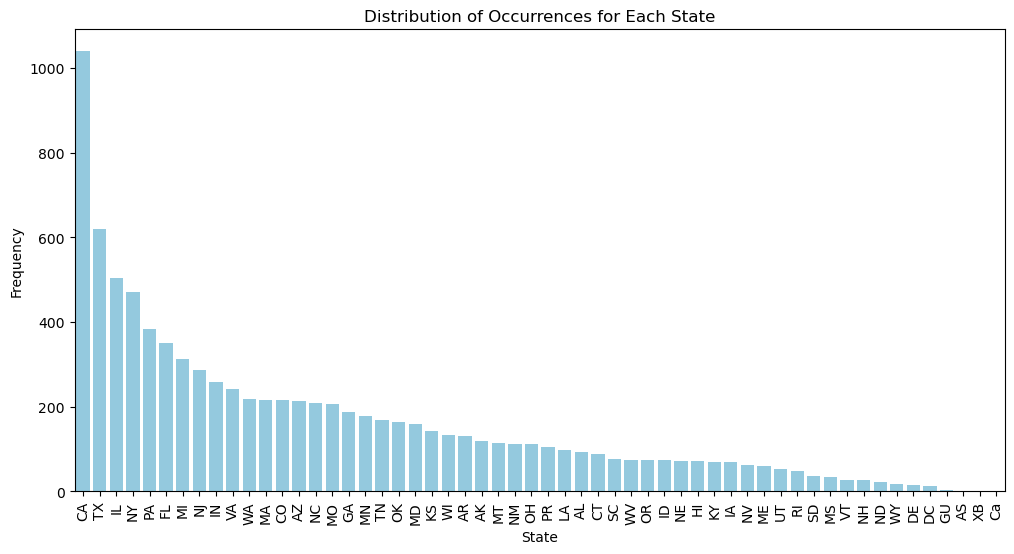

In [291]:
state_distribution = result_df['STATE'].value_counts()

# Visualize 
plt.figure(figsize=(12, 6))
sns.barplot(x=state_distribution.index, y=state_distribution.values, color='skyblue')
plt.title('Distribution of Occurrences for Each State')
plt.xlabel('State')
plt.ylabel('Frequency')
plt.show()


##### Age Distribution

Count for each age:
AGE_YRS
41.00     284
35.00     281
39.00     276
38.00     262
49.00     249
33.00     248
43.00     248
34.00     247
32.00     246
37.00     244
50.00     243
36.00     242
42.00     236
40.00     230
48.00     229
29.00     228
31.00     227
44.00     227
30.00     222
46.00     222
45.00     218
28.00     217
47.00     213
52.00     211
54.00     193
27.00     192
51.00     189
57.00     180
56.00     179
26.00     174
58.00     174
55.00     169
25.00     163
53.00     160
59.00     159
62.00     154
60.00     152
61.00     140
24.00     114
63.00     108
23.00     106
65.00      92
64.00      82
22.00      78
66.00      67
67.00      55
21.00      52
68.00      40
20.00      34
70.00      32
72.00      25
69.00      25
71.00      20
73.00      19
19.00      19
76.00      14
75.00      12
77.00      11
74.00      11
82.00      10
83.00       9
18.00       8
90.00       8
78.00       7
85.00       7
88.00       6
86.00       6
79.00       6
80.00       5
17.00 

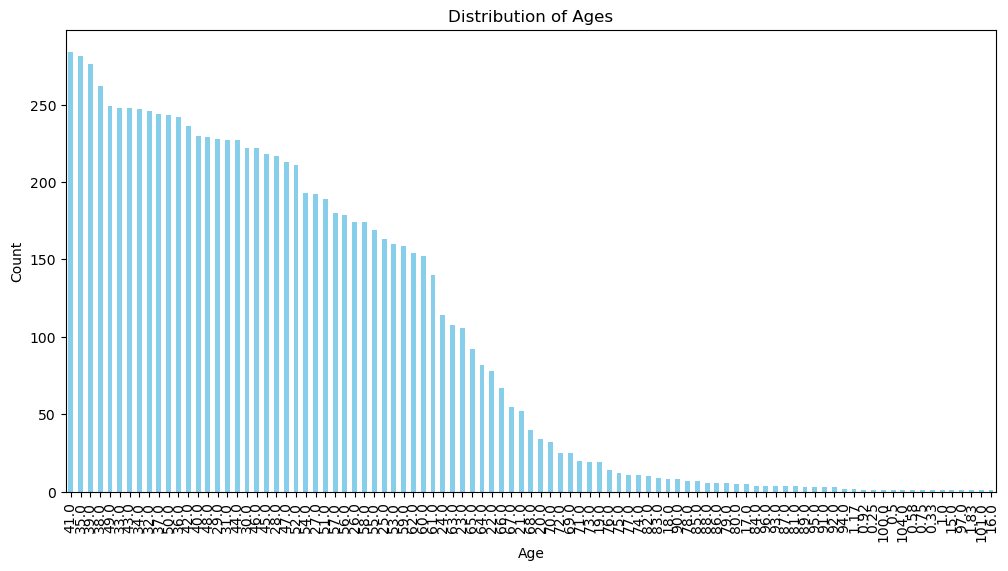

In [292]:
age_counts = result_df['AGE_YRS'].value_counts()

# Count for each age
print("Count for each age:")
print(age_counts)

# Maximum count and corresponding age
max_count_age = age_counts.idxmax()
max_count = age_counts.max()
print(f"\nMaximum count: {max_count} for age: {max_count_age}")

# Minimum count and corresponding age
min_count_age = age_counts.idxmin()
min_count = age_counts.min()
print(f"\nMinimum count: {min_count} for age: {min_count_age}")

# Plotting the distribution of ages
plt.figure(figsize=(12, 6))
age_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

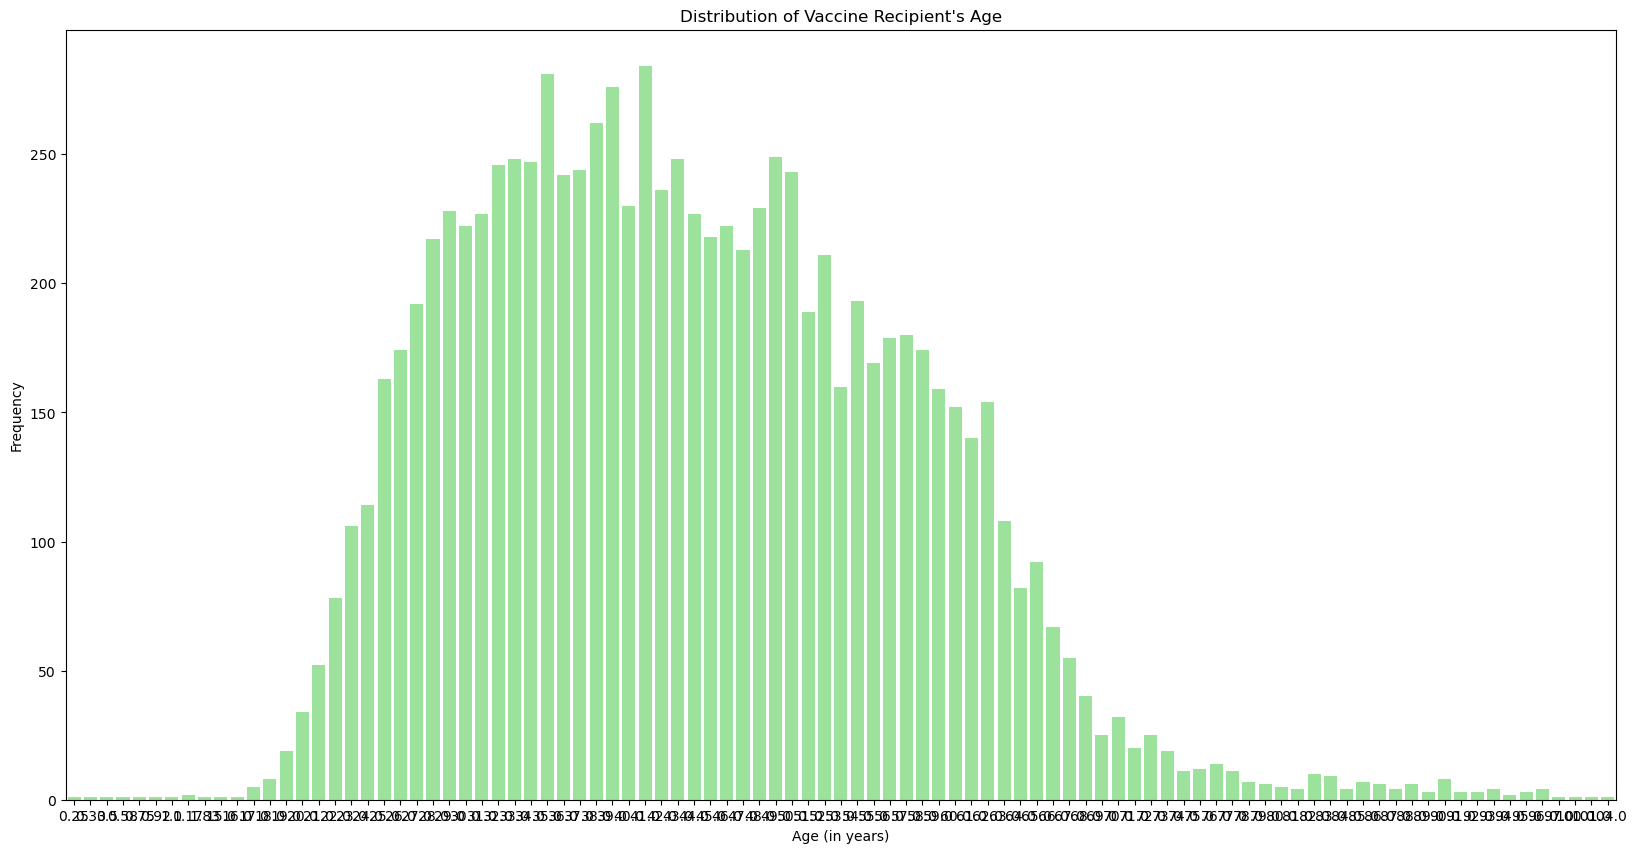

In [293]:
age_distribution = result_df['AGE_YRS'].value_counts()

# Visualize 
plt.figure(figsize=(20, 10))
sns.barplot(x=age_distribution.index, y=age_distribution.values, color='lightgreen')
plt.title('Distribution of Vaccine Recipient\'s Age')
plt.xlabel('Age (in years)')
plt.ylabel('Frequency')
plt.show()


##### Gender Distribution

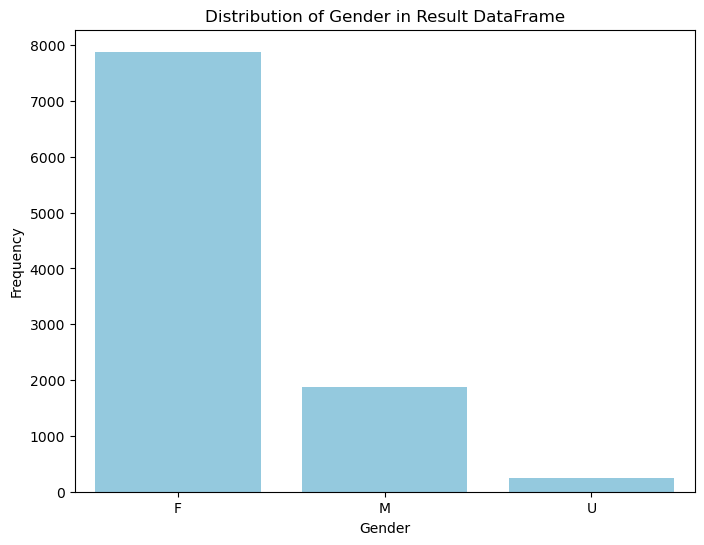

In [296]:
gender_distribution = result_df['SEX'].value_counts()

# Visualize
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_distribution.index, y=gender_distribution.values, color='skyblue')
plt.title('Distribution of Gender in Result DataFrame')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

##### Distribution of Length of Reports


Distribution of Report Length:
count    9996.000000
mean      482.290416
std       607.725064
min         2.000000
25%        94.000000
50%       247.000000
75%       662.000000
max      8180.000000
Name: SYMPTOM_TEXT, dtype: float64


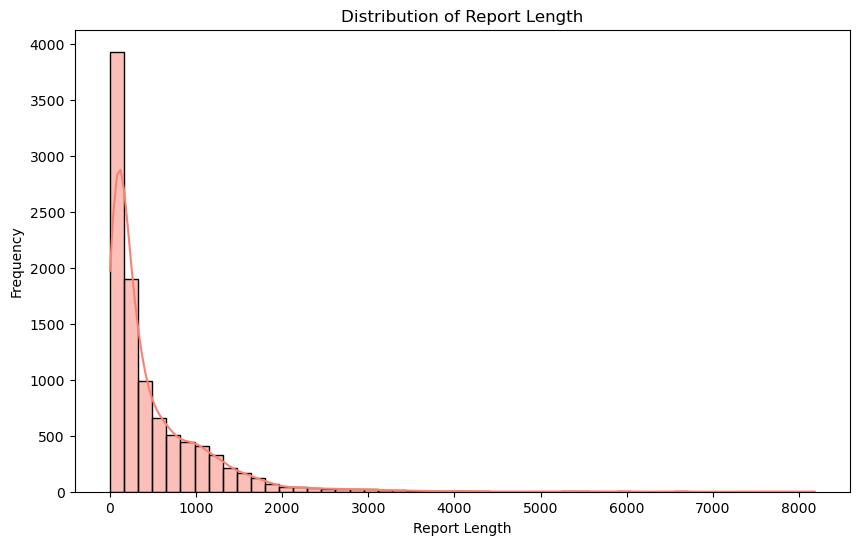

In [297]:
report_length_distribution = selected_data['SYMPTOM_TEXT'].apply(len)
print("\nDistribution of Report Length:")
print(report_length_distribution.describe())

# Visualize 
plt.figure(figsize=(10, 6))
sns.histplot(report_length_distribution, bins=50, kde=True, color='salmon')
plt.title('Distribution of Report Length')
plt.xlabel('Report Length')
plt.ylabel('Frequency')
plt.show()

##### Adverse Event - Death

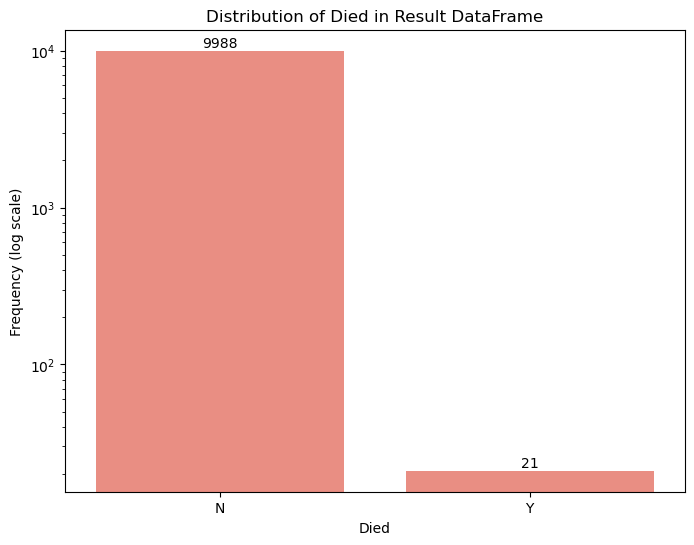

In [298]:
died_distribution = result_df['DIED'].fillna('N').value_counts()

# Visualize 
plt.figure(figsize=(8, 6))
sns.barplot(x=died_distribution.index, y=died_distribution.values, color='salmon')
plt.yscale('log')  
plt.title('Distribution of Died in Result DataFrame')
plt.xlabel('Died')
plt.ylabel('Frequency (log scale)')

for i, count in enumerate(died_distribution.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()


##### Adverse Event - Life Threatening

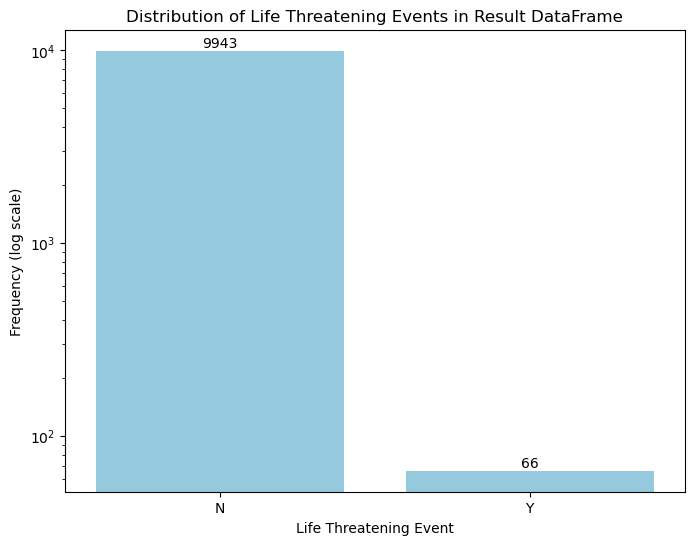

In [299]:
l_threat_distribution = result_df['L_THREAT'].fillna('N').value_counts()

# Visualize
plt.figure(figsize=(8, 6))
sns.barplot(x=l_threat_distribution.index, y=l_threat_distribution.values, color='skyblue')
plt.yscale('log')  
plt.title('Distribution of Life Threatening Events in Result DataFrame')
plt.xlabel('Life Threatening Event')
plt.ylabel('Frequency (log scale)')

for i, count in enumerate(l_threat_distribution.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

##### Adverse Event - ER Visit

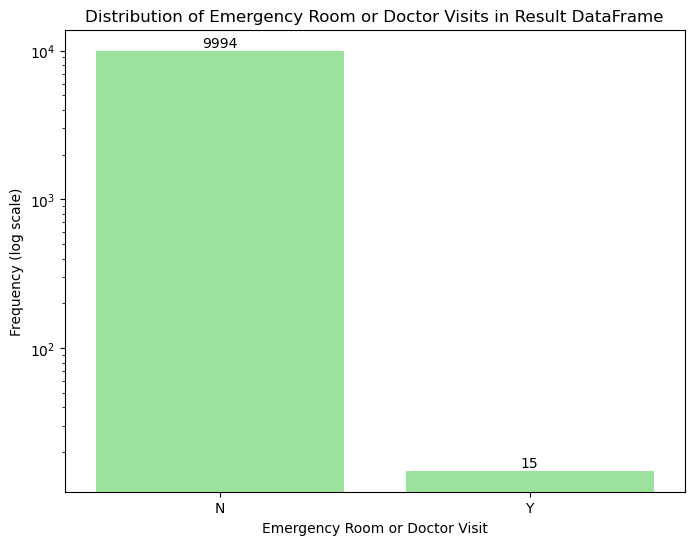

In [300]:
er_visit_distribution = result_df['ER_VISIT'].fillna('N').value_counts()

# Visualize 
plt.figure(figsize=(8, 6))
sns.barplot(x=er_visit_distribution.index, y=er_visit_distribution.values, color='lightgreen')
plt.yscale('log')  
plt.title('Distribution of Emergency Room or Doctor Visits in Result DataFrame')
plt.xlabel('Emergency Room or Doctor Visit')
plt.ylabel('Frequency (log scale)')

for i, count in enumerate(er_visit_distribution.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

##### Adverse Event - Hospitalization

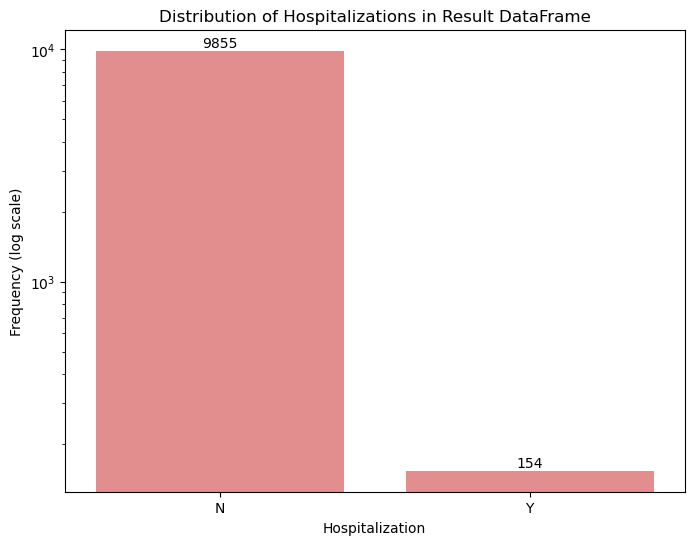

In [301]:
hospital_distribution = result_df['HOSPITAL'].fillna('N').value_counts()

# Visualize 
plt.figure(figsize=(8, 6))
sns.barplot(x=hospital_distribution.index, y=hospital_distribution.values, color='lightcoral')
plt.yscale('log')  # Set the y-axis to a logarithmic scale
plt.title('Distribution of Hospitalizations in Result DataFrame')
plt.xlabel('Hospitalization')
plt.ylabel('Frequency (log scale)')

for i, count in enumerate(hospital_distribution.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

##### Adverse Event - Disability

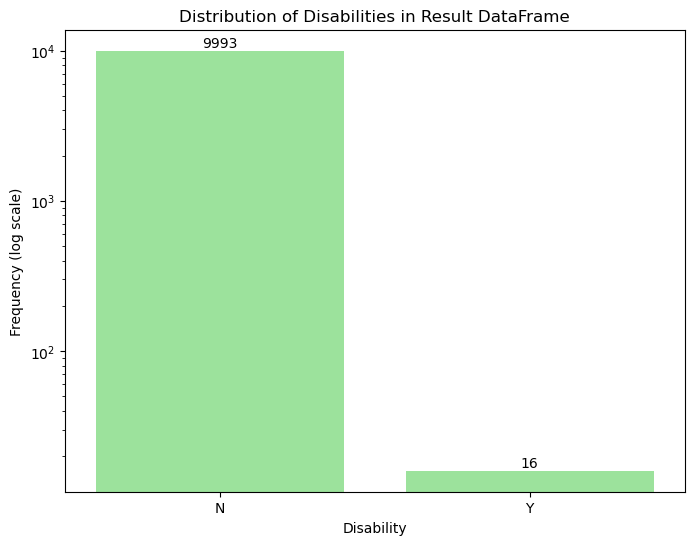

In [302]:
disable_distribution = result_df['DISABLE'].fillna('N').value_counts()

# Visualize
plt.figure(figsize=(8, 6))
sns.barplot(x=disable_distribution.index, y=disable_distribution.values, color='lightgreen')
plt.yscale('log')  
plt.title('Distribution of Disabilities in Result DataFrame')
plt.xlabel('Disability')
plt.ylabel('Frequency (log scale)')

# Display
for i, count in enumerate(disable_distribution.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

##### Recovery from Adverse Events

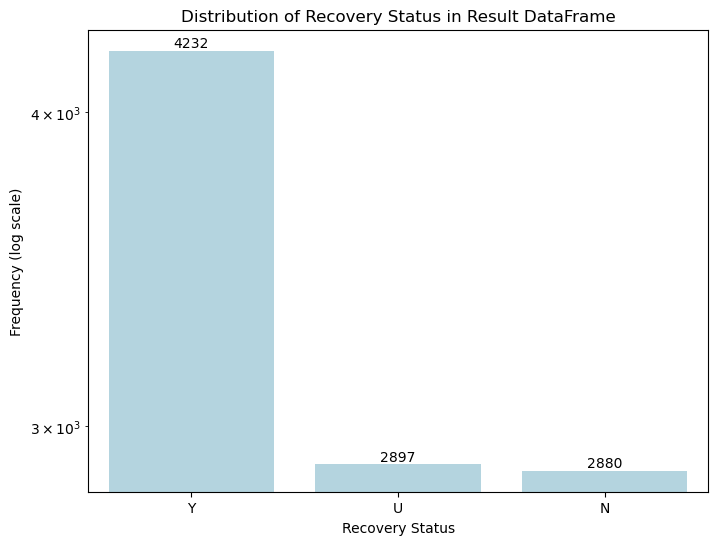

In [303]:
recovery_distribution = result_df['RECOVD'].fillna('U').value_counts()

# Visualize 
plt.figure(figsize=(8, 6))
sns.barplot(x=recovery_distribution.index, y=recovery_distribution.values, color='lightblue')
plt.yscale('log') 
plt.title('Distribution of Recovery Status in Result DataFrame')
plt.xlabel('Recovery Status')
plt.ylabel('Frequency (log scale)')

for i, count in enumerate(recovery_distribution.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()


##### Vaccine Manifacturer

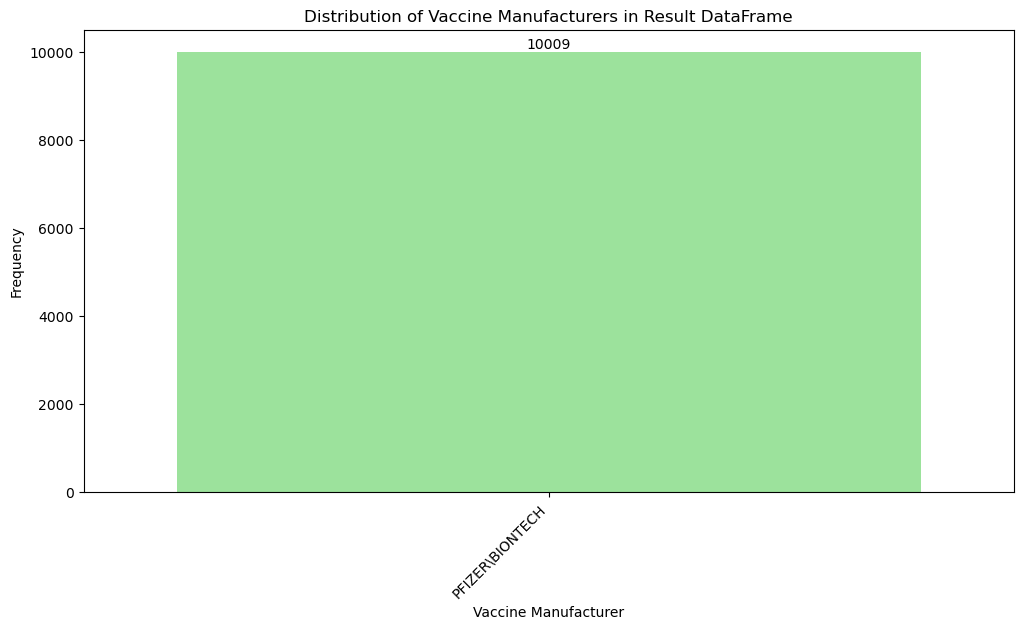

In [304]:
manufacturer_distribution = result_df['VAX_MANU'].value_counts()

# Visualize 
plt.figure(figsize=(12, 6))
sns.barplot(x=manufacturer_distribution.index, y=manufacturer_distribution.values, color='lightgreen')
plt.title('Distribution of Vaccine Manufacturers in Result DataFrame')
plt.xlabel('Vaccine Manufacturer')
plt.ylabel('Frequency')
for i, count in enumerate(manufacturer_distribution.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

##### Vaccine Dose Series

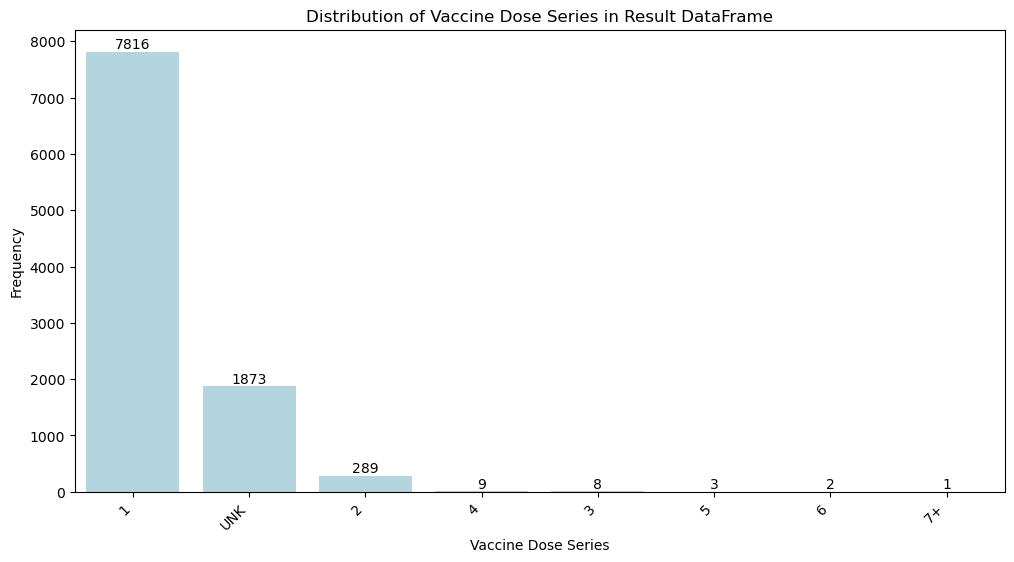

In [305]:
dose_series_distribution = result_df['VAX_DOSE_SERIES'].value_counts()

# Visualize 
plt.figure(figsize=(12, 6))
sns.barplot(x=dose_series_distribution.index, y=dose_series_distribution.values, color='lightblue')
plt.title('Distribution of Vaccine Dose Series in Result DataFrame')
plt.xlabel('Vaccine Dose Series')
plt.ylabel('Frequency')

for i, count in enumerate(dose_series_distribution.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

##### Vaccine Route

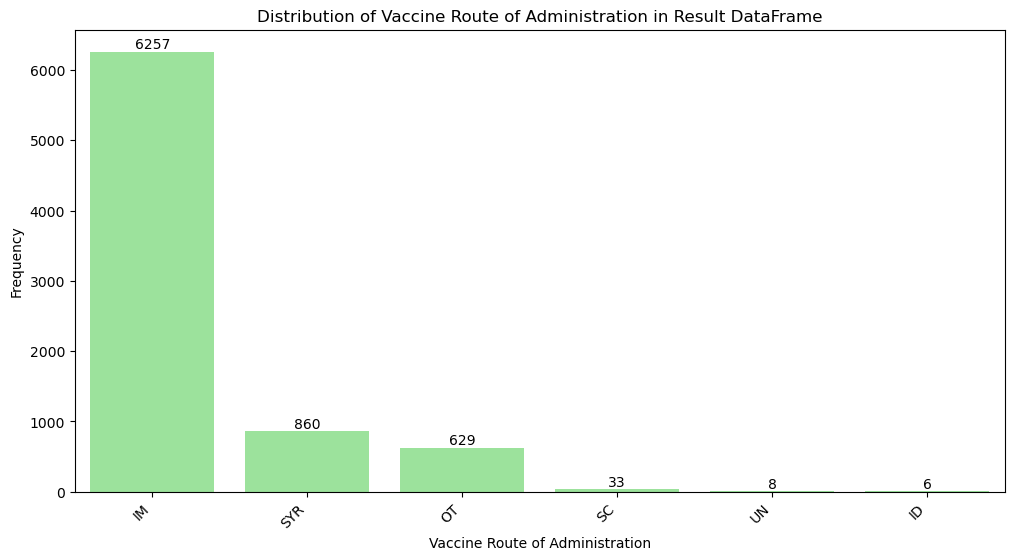

In [306]:
vax_route_distribution = result_df['VAX_ROUTE'].value_counts()

# Visualize 
plt.figure(figsize=(12, 6))
sns.barplot(x=vax_route_distribution.index, y=vax_route_distribution.values, color='lightgreen')
plt.title('Distribution of Vaccine Route of Administration in Result DataFrame')
plt.xlabel('Vaccine Route of Administration')
plt.ylabel('Frequency')

for i, count in enumerate(vax_route_distribution.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

##### Vaccine Site

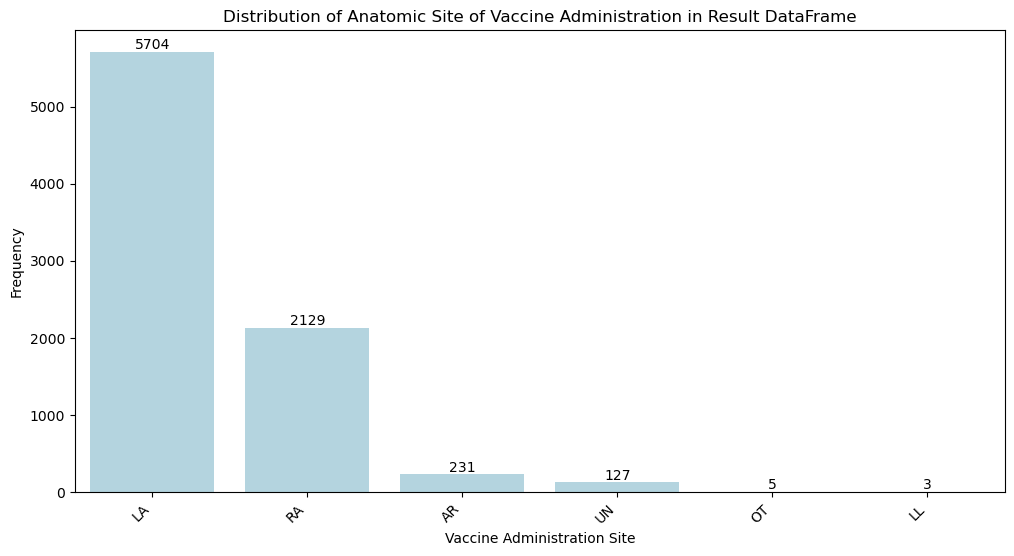

In [307]:
vax_site_distribution = result_df['VAX_SITE'].value_counts()

# Visualize 
plt.figure(figsize=(12, 6))
sns.barplot(x=vax_site_distribution.index, y=vax_site_distribution.values, color='lightblue')
plt.title('Distribution of Anatomic Site of Vaccine Administration in Result DataFrame')
plt.xlabel('Vaccine Administration Site')
plt.ylabel('Frequency')

for i, count in enumerate(vax_site_distribution.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

##### Vaccine Name

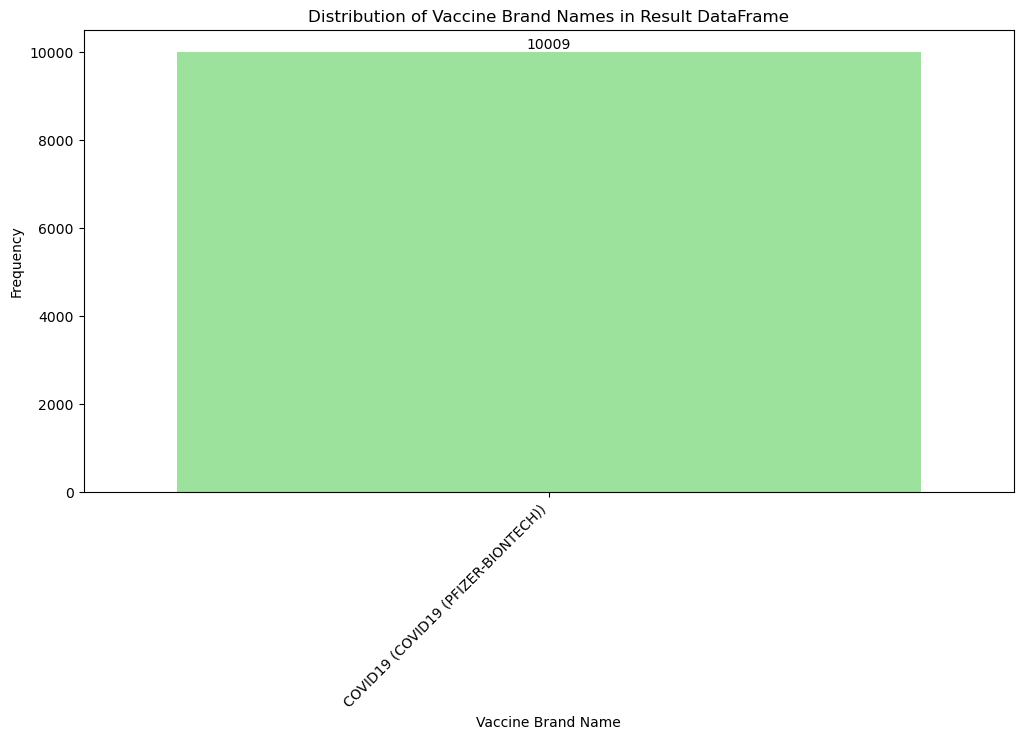

In [308]:
vax_name_distribution = result_df['VAX_NAME'].value_counts()

# Visualize the distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=vax_name_distribution.index, y=vax_name_distribution.values, color='lightgreen')
plt.title('Distribution of Vaccine Brand Names in Result DataFrame')
plt.xlabel('Vaccine Brand Name')
plt.ylabel('Frequency')

for i, count in enumerate(vax_name_distribution.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()


Top 10 Most Frequent Symptoms:
SYMPTOM_TEXT
none stated                                                                                          64
vial diluted incorrectly patient received 42 mcg pfizer vaccine adverse reaction reported patient    23
pain injection site                                                                                  10
treatment dug                                                                                        10
metallic taste                                                                                        9
headache                                                                                              7
injection site pain                                                                                   7
soreness injection site                                                                               6
sore arm                                                                                              6
nausea             

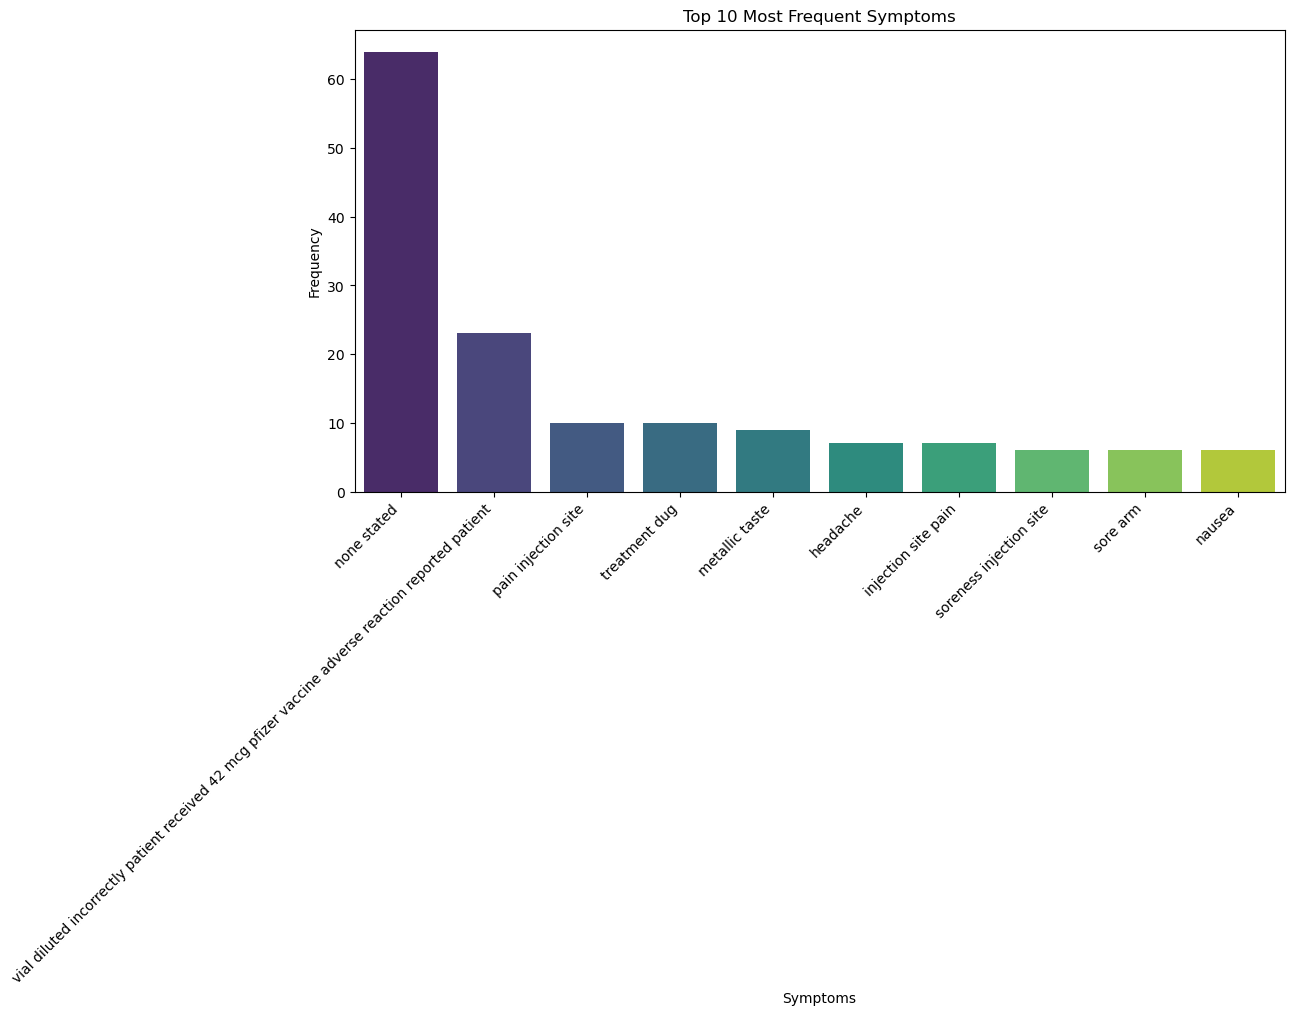

In [309]:
symptom_counts = result_df['SYMPTOM_TEXT'].value_counts().head(10)
print("\nTop 10 Most Frequent Symptoms:")
print(symptom_counts)

# Visualize 
plt.figure(figsize=(12, 6))
sns.barplot(x=symptom_counts.index, y=symptom_counts.values, palette="viridis")
plt.title('Top 10 Most Frequent Symptoms')
plt.xlabel('Symptoms')
plt.ylabel('Frequency')
plt.show()

# Named Entity Recognition

In [22]:
import stanza
import pandas as pd

# Stanza pipeline with Mimic and i2b2
stanza.download('en', package='mimic', processors={'ner': 'i2b2'})
nlp = stanza.Pipeline('en', package='mimic', processors={'ner': 'i2b2'})

# Extracting symptom-related entities
def extract_symptom_entities(text, nlp):
    doc = nlp(text)
    entities = [entity.text for sent in doc.sentences for entity in sent.ents if entity.type in ["PROBLEM", "DISEASES"]]
    return entities

2023-12-10 10:47:35 INFO: Downloading these customized packages for language: en (English)...
| Processor       | Package        |
------------------------------------
| tokenize        | mimic          |
| pos             | mimic_charlm   |
| lemma           | mimic_nocharlm |
| depparse        | mimic_charlm   |
| ner             | i2b2           |
| forward_charlm  | mimic          |
| pretrain        | mimic          |
| backward_charlm | mimic          |

2023-12-10 10:47:35 INFO: File exists: C:\Users\madha\stanza_resources\en\tokenize\mimic.pt
2023-12-10 10:47:35 INFO: File exists: C:\Users\madha\stanza_resources\en\pos\mimic_charlm.pt
2023-12-10 10:47:35 INFO: File exists: C:\Users\madha\stanza_resources\en\lemma\mimic_nocharlm.pt
2023-12-10 10:47:36 INFO: File exists: C:\Users\madha\stanza_resources\en\depparse\mimic_charlm.pt
2023-12-10 10:47:36 INFO: File exists: C:\Users\madha\stanza_resources\en\ner\i2b2.pt
2023-12-10 10:47:36 INFO: File exists: C:\Users\madha\stanza_resou

2023-12-10 10:47:39 INFO: Loading these models for language: en (English):
| Processor | Package        |
------------------------------
| tokenize  | mimic          |
| pos       | mimic_charlm   |
| lemma     | mimic_nocharlm |
| depparse  | mimic_charlm   |
| ner       | i2b2           |

2023-12-10 10:47:39 INFO: Using device: cpu
2023-12-10 10:47:39 INFO: Loading: tokenize
2023-12-10 10:47:41 INFO: Loading: pos
2023-12-10 10:47:41 INFO: Loading: lemma
2023-12-10 10:47:41 INFO: Loading: depparse
2023-12-10 10:47:42 INFO: Loading: ner
2023-12-10 10:47:43 INFO: Done loading processors!


In [23]:
# Extracting Symptoms
result_df['Extracted_Symptoms'] = result_df['SYMPTOM_TEXT'].apply(lambda x: extract_symptom_entities(x, nlp))

In [24]:
# Storing extracted data in csv file
result_df.to_csv('covid_file.csv', index=False)

In [25]:
print(result_df[['SYMPTOM_TEXT', 'Extracted_Symptoms']])

                                            SYMPTOM_TEXT  \
0      headache fever body ache narrative relevant hi...   
1      patient experienced mild numbness traveling in...   
2                                            co headache   
3                     felt warm hot face ear red flushed   
4      within 15 minute progressive lightheadedness l...   
...                                                  ...   
10004  ache chill spontaneous report contactable nurs...   
10005  10 minute administration back tongue soft pala...   
10006  severe headache spontaneous report contactable...   
10007  fever dizziness light headedness servere muscl...   
10008  golf ball size swelling injection site arm red...   

                                      Extracted_Symptoms  
0                           [headache, fever, body ache]  
1                                        [mild numbness]  
2                                          [co headache]  
3                                          

In [34]:
extracted = result_df['Extracted_Symptoms']

In [339]:
extracted

0                             [headache, fever, body ache]
1                                          [mild numbness]
2                                            [co headache]
3                                                       []
4        [15 minute progressive lightheadedness, nearsy...
5        [mouth tingling, shaking, hand tingling, tongu...
6        [symptom, lightheadedness, flushing, water sym...
7                       [chest pain, really bad heartburn]
8                                    [headache, body ache]
9        [lightheadedness, shortness breath, headache, ...
10       [dizziness, hot nauseated, difficulty breathin...
11                                           [lightheaded]
12       [facial flushing, chest burning, chest hand sy...
13          [tightness right side throat tongue, tingling]
14                                                      []
15       [tingling upper lip cheek warmth, itchy, outco...
16                        [shaky hand shaking, weak tire

In [35]:
# Processing each symptom list in extracted data, replace blank space with underscore
def process_symptom_list(symptom_list):
    return [word.replace(' ', '_') for word in symptom_list]


In [36]:
processed_symptoms = extracted.apply(process_symptom_list)

In [340]:
processed_symptoms

0                             [headache, fever, body_ache]
1                                          [mild_numbness]
2                                            [co_headache]
3                                                       []
4        [15_minute_progressive_lightheadedness, nearsy...
5        [mouth_tingling, shaking, hand_tingling, tongu...
6        [symptom, lightheadedness, flushing, water_sym...
7                       [chest_pain, really_bad_heartburn]
8                                    [headache, body_ache]
9        [lightheadedness, shortness_breath, headache, ...
10       [dizziness, hot_nauseated, difficulty_breathin...
11                                           [lightheaded]
12       [facial_flushing, chest_burning, chest_hand_sy...
13          [tightness_right_side_throat_tongue, tingling]
14                                                      []
15       [tingling_upper_lip_cheek_warmth, itchy, outco...
16                        [shaky_hand_shaking, weak_tire

### Get unique extracted symptoms

In [321]:
exploded_symptoms = processed_symptoms.explode()
unique_extracted_symptoms = exploded_symptoms.unique()

In [324]:
unique_extracted_symptoms = unique_extracted_symptoms.tolist()

In [328]:
# Store unique extracted symptoms in text file
with open('extracted_symptoms_all.txt', 'w') as file:
    for symptom in unique_extracted_symptoms:
        file.write(str(symptom) + '\n')

#### Total unique extracted symptoms = 17426, selecting top 1500 only for the linking process

In [385]:
# Get the counts of each symptom
symptom_counts = exploded_symptoms.value_counts()

# Get the 1500 most common symptoms 
most_common_extracted_symptoms = symptom_counts.head(1500)

In [386]:
most_common_extracted_symptoms

Extracted_Symptoms
headache                                           2415
fever                                              1402
nausea                                             1299
symptom                                            1008
chill                                               802
dizziness                                           743
fatigue                                             643
body_ache                                           456
dizzy                                               417
shortness_breath                                    375
diarrhea                                            367
vomiting                                            351
itching                                             308
tachycardia                                         284
pain                                                283
rash                                                277
sore_throat                                         252
joint_pain                   

In [390]:
extracted_symptoms = most_common_extracted_symptoms.index

# Entity Linking with Word2Vec

#### Load the Word2Vec model


In [85]:
from gensim.models import Word2Vec

model1_path = 'W2V_100/w2v_OA_CR_100d.bin'  
model1 = Word2Vec.load(model1_path)


In [391]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np


# This will hold the linked entities with the highest similarity
linked_symptoms_w2v = {}

# Ierate over each extracted symptom
for extracted_symptom in extracted_symptoms:
    # Check if the extracted symptom is in the vocabulary
    if extracted_symptom in model1.wv:
        # Get the vector representation
        extracted_vector = model1.wv[extracted_symptom]
    else:
        continue

    max_similarity = 0
    linked_standard_symptom = ''
    
    # Iterate over each standard symptom and compute similarity with extracted symptom
    for standard_symptom in formatted_symptoms:
        # Check if standard_symptom is in the vocabulary
        if standard_symptom in model1.wv:
            # Get the vector representation
            std_symp = model1.wv[standard_symptom]
            # Compute teh cosine similarity between extraced and standard symptom
            similarity_matrix = cosine_similarity([extracted_vector], [std_symp])
            # Extract the similarity value from the matrix
            similarity = similarity_matrix[0][0]  
        else:
            continue
        
        # Link the symptoms with highest similarity score
        if similarity > max_similarity:
            max_similarity = similarity
            linked_standard_symptom = standard_symptom

    linked_symptoms_w2v[extracted_symptom] = {'linked_symptom': linked_standard_symptom, 'similarity_score': max_similarity}


In [392]:
# Print the linked symptoms
for extracted_symptom, linked_standard_symptom in linked_symptoms_w2v.items():
    print(f"{extracted_symptom} -> {linked_standard_symptom}")

headache -> {'linked_symptom': 'headache', 'similarity_score': 1.0}
fever -> {'linked_symptom': 'chills', 'similarity_score': 0.8725158}
nausea -> {'linked_symptom': 'nausea', 'similarity_score': 1.0}
symptom -> {'linked_symptom': 'pain', 'similarity_score': 0.6784411}
chill -> {'linked_symptom': 'decreased_appetite', 'similarity_score': 0.898724}
dizziness -> {'linked_symptom': 'dizziness', 'similarity_score': 0.99999994}
fatigue -> {'linked_symptom': 'fatigue', 'similarity_score': 1.0000001}
dizzy -> {'linked_symptom': 'decreased_appetite', 'similarity_score': 0.7904465}
diarrhea -> {'linked_symptom': 'diarrhoea', 'similarity_score': 0.8952793}
vomiting -> {'linked_symptom': 'vomiting', 'similarity_score': 1.0}
itching -> {'linked_symptom': 'pruritus', 'similarity_score': 0.8161969}
tachycardia -> {'linked_symptom': 'tachycardia', 'similarity_score': 1.0000001}
pain -> {'linked_symptom': 'pain', 'similarity_score': 1.0}
rash -> {'linked_symptom': 'rash', 'similarity_score': 1.0000001

# Entity Linking with Glove Model

#### Load the GloVe model

In [403]:
from gensim.models import KeyedVectors

model2_path = 'converted_to_word2vec_100.txt'  
glove_model = KeyedVectors.load_word2vec_format(model2_path, binary=False)


In [404]:
# This will hold the linked entities with the highest similarity
linked_symptoms_glove = {}

# Ierate over each extracted symptom
for extracted_symptom in extracted_symptoms:
    # Check if the extracted symptom is in the vocabulary
    if extracted_symptom in glove_model.key_to_index:
        # Get the vector representation
        extracted_vector = glove_model[extracted_symptom].reshape(1, -1)  
    
    else:
        continue

    max_similarity = 0
    linked_standard_symptom = ''
    
    # Iterate over each standard symptom and compute similarity with extracted symptom
    for standard_symptom in formatted_symptoms:
        # Check if standard_symptom is in the vocabulary
        if standard_symptom in glove_model.key_to_index:
            # Get the vector representation
            std_symp = glove_model[standard_symptom].reshape(1, -1)
            # Compute teh cosine similarity between extraced and standard symptom
            similarity_matrix = cosine_similarity(extracted_vector, std_symp)
            # Extract the similarity value from the matrix
            similarity = similarity_matrix[0][0]  
        else:
            continue
            
        # Link the symptoms with highest similarity score
        if similarity > max_similarity:
            max_similarity = similarity
            linked_standard_symptom = standard_symptom

    linked_symptoms_glove[extracted_symptom] = {'linked_symptom': linked_standard_symptom, 'similarity_score': max_similarity}

In [405]:
# Print the linked symptoms
for extracted_symptom, linked_standard_symptom in linked_symptoms_glove.items():
    print(f"{extracted_symptom} -> {linked_standard_symptom}")

headache -> {'linked_symptom': 'headache', 'similarity_score': 0.9999999}
fever -> {'linked_symptom': 'cough', 'similarity_score': 0.6670736}
nausea -> {'linked_symptom': 'nausea', 'similarity_score': 1.0}
symptom -> {'linked_symptom': 'headache', 'similarity_score': 0.6984913}
chill -> {'linked_symptom': 'decreased_appetite', 'similarity_score': 0.48571718}
dizziness -> {'linked_symptom': 'dizziness', 'similarity_score': 1.0}
fatigue -> {'linked_symptom': 'fatigue', 'similarity_score': 1.0}
dizzy -> {'linked_symptom': 'muscle_spasms', 'similarity_score': 0.460449}
diarrhea -> {'linked_symptom': 'diarrhoea', 'similarity_score': 0.6705305}
vomiting -> {'linked_symptom': 'vomiting', 'similarity_score': 1.0}
itching -> {'linked_symptom': 'pruritus', 'similarity_score': 0.5180022}
tachycardia -> {'linked_symptom': 'tachycardia', 'similarity_score': 0.99999994}
pain -> {'linked_symptom': 'pain', 'similarity_score': 1.0000001}
rash -> {'linked_symptom': 'rash', 'similarity_score': 1.0000001}

# Entity Linking with FastText

#### Load the FastText Model

In [213]:
from gensim.models import FastText
fasttext_model = FastText.load('ft_oa_corp_100d.bin')


In [396]:
# This will hold the linked entities with the highest similarity
linked_symptoms_ft = {}

for extracted_symptom in extracted_symptoms:
    # Check if the extracted symptom is in the vocabulary
    if extracted_symptom in fasttext_model.wv.key_to_index:
        # Get the vector representation
        ext_idx = fasttext_model.wv.key_to_index[extracted_symptom]
        extracted_vector = fasttext_model.wv[extracted_symptom]  
    else:
        continue

    max_similarity = 0
    linked_standard_symptom = ''
    
    # Iterate over each standard symptom and compute similarity with extracted symptom
    for symptom in formatted_symptoms:
        # Check if standard_symptom is in the vocabulary
        if symptom in fasttext_model.wv.key_to_index:
            # Get the vector representation
            sym_idx = fasttext_model.wv.key_to_index[symptom]
            sym_vect = fasttext_model.wv[symptom]
            # Compute teh cosine similarity between extraced and standard symptom
            similarity_matrix = cosine_similarity([extracted_vector], [sym_vect])
            # Extract the similarity value from the matrix
            similarity = similarity_matrix[0][0]  
        else:
            continue
            
        # Link the symptoms with highest similarity score
        if similarity > max_similarity:
            max_similarity = similarity
            linked_standard_symptom = symptom

    linked_symptoms_ft[extracted_symptom] = {'linked_symptom': linked_standard_symptom, 'similarity_score': max_similarity}


In [397]:
# Print the linked symptoms
for extracted_symptom, linked_standard_symptom in linked_symptoms_ft.items():
    print(f"{extracted_symptom} -> {linked_standard_symptom}")

headache -> {'linked_symptom': 'headache', 'similarity_score': 1.0000001}
fever -> {'linked_symptom': 'chills', 'similarity_score': 0.8955573}
nausea -> {'linked_symptom': 'nausea', 'similarity_score': 0.99999994}
symptom -> {'linked_symptom': 'pain', 'similarity_score': 0.6894891}
chill -> {'linked_symptom': 'chills', 'similarity_score': 0.9360428}
dizziness -> {'linked_symptom': 'dizziness', 'similarity_score': 1.0}
fatigue -> {'linked_symptom': 'fatigue', 'similarity_score': 1.0}
dizzy -> {'linked_symptom': 'dizziness', 'similarity_score': 0.86693776}
diarrhea -> {'linked_symptom': 'diarrhoea', 'similarity_score': 0.93587077}
vomiting -> {'linked_symptom': 'vomiting', 'similarity_score': 1.0}
itching -> {'linked_symptom': 'pruritus', 'similarity_score': 0.8103937}
tachycardia -> {'linked_symptom': 'tachycardia', 'similarity_score': 1.0}
pain -> {'linked_symptom': 'pain', 'similarity_score': 0.9999998}
rash -> {'linked_symptom': 'rash', 'similarity_score': 1.0}
sore_throat -> {'linke

# Evaluation

### Manual Evaluation

#### For Similarity Score Threshold of 0.6
1. Word2Vec Model - 47/50
2. GloVe Model - 15/50
3. FastText Model - 46/50

### Generated ground truth with ChatGPT and stored in txt file

In [398]:
ground_truth_file = 'ground_truth.txt'

with open(ground_truth_file, 'r') as file:
    ground_truth_data = eval(file.read())


In [399]:
# Displaying the ground truth
count = 0
for key, value in ground_truth_data.items():
    print(f"{key}: {value}")
    count += 1
    if count == 1500:
        break


headache: headache
fever: pyrexia
nausea: nausea
symptom: symptom
chill: chills
dizziness: dizziness
fatigue: fatigue
body_ache: body_temperature
dizzy: dizziness
shortness_breath: dyspnoea
diarrhea: diarrhoea
vomiting: vomiting
itching: pruritus
tachycardia: tachycardia
pain: pain
rash: rash
sore_throat: sore_throat
joint_pain: arthralgia
chest_pain: chest_pain
lightheaded: dizziness
lightheadedness: dizziness
tingling: paraesthesia
allergy: urticaria
palpitation: palpitations
muscle_pain: myalgia
sob: dyspnoea
severe_headache: headache
low_grade_fever: pyrexia
itchy: pruritus
cough: cough
allergic_reaction: urticaria
migraine: migraine
extreme_fatigue: fatigue
muscle_ache: myalgia
injection_site: injection site pain
mild_headache: headache
difficulty_breathing: dyspnoea
myalgia: myalgia
anxiety: anxiety
chest_tightness: chest discomfort
injection_site_pain: injection site pain
swelling: swelling
tiredness: fatigue
malaise: malaise
pain_injection_site: injection site pain
known_allerg

##### Word2Vec Performance

In [400]:
correct_predictions = 0
total_predictions = len(linked_symptoms_w2v)

for extracted_symptom, info in linked_symptoms_w2v.items():
    linked_symptom = info['linked_symptom']

    # Check if the linked symptom matches the ground truth
    if linked_symptom == ground_truth_data.get(extracted_symptom, ''):
        correct_predictions += 1
        
accuracy = correct_predictions / total_predictions
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 19.11%


##### GloVe Performance

In [406]:
correct_predictions = 0
total_predictions = len(linked_symptoms_glove)

for extracted_symptom, info in linked_symptoms_glove.items():
    linked_symptom = info['linked_symptom']

    # Check if the linked symptom matches the ground truth
    if linked_symptom == ground_truth_data.get(extracted_symptom, ''):
        correct_predictions += 1
        
accuracy = correct_predictions / total_predictions
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 12.94%


##### FastText Performance

In [402]:
correct_predictions = 0
total_predictions = len(linked_symptoms_ft)

for extracted_symptom, info in linked_symptoms_ft.items():
    linked_symptom = info['linked_symptom']

    # Check if the linked symptom matches the ground truth
    if linked_symptom == ground_truth_data.get(extracted_symptom, ''):
        correct_predictions += 1
        
accuracy = correct_predictions / total_predictions
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 29.78%
